In [11]:
!mkdir fml-project
!cd fml-project
!pwd

mkdir: cannot create directory ‘fml-project’: File exists
/content


In [2]:
!git clone -b master https://github.com/sanchitkadwe/fml-project.git

Cloning into 'fml-project'...
remote: Enumerating objects: 2046, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 2046 (delta 12), reused 32 (delta 4), pack-reused 1997 (from 1)
Receiving objects: 100% (2046/2046), 1.20 GiB | 28.57 MiB/s, done.
Resolving deltas: 100% (12/12), done.
Updating files: 100% (2002/2002), done.


In [3]:
import os
import librosa
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

In [12]:
file_name = "./fml-project/genres_original/blues/blues.00009.wav"

In [13]:
y, sampling_rate = librosa.load(file_name,sr=22050)

In [14]:
y , sampling_rate

(array([ 0.04647827,  0.06399536,  0.04327393, ..., -0.04052734,
        -0.03955078, -0.03741455], dtype=float32),
 22050)

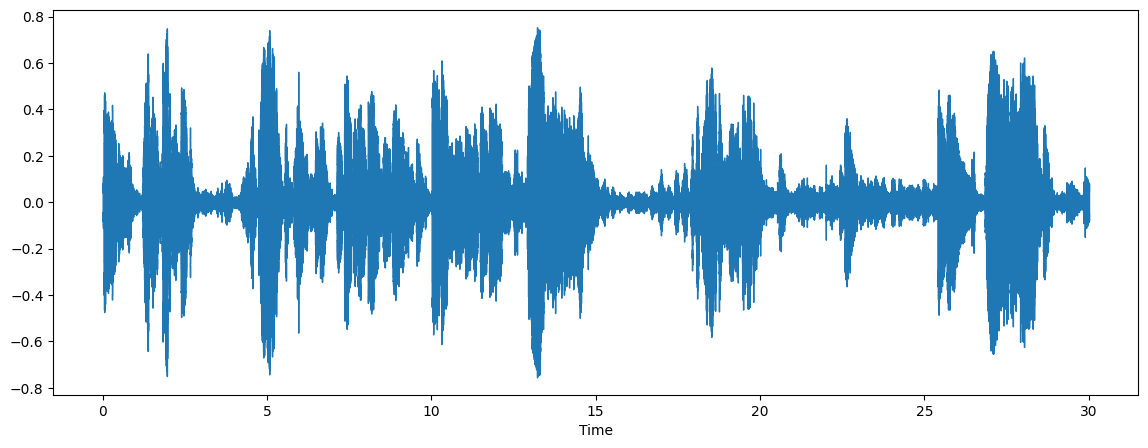

In [15]:
plt.figure(figsize=(14,5))
librosa.display.waveshow(y, sr=sampling_rate)

In [16]:
from IPython.display import Audio
Audio(file_name)

Visualization of Audio Chunks

In [18]:
y,sr = librosa.load(file_name,sr=None)

In [19]:
chunk_duration = 4
overlap_duration = 2

In [20]:
chunk_samples = int(chunk_duration * sr)
overlap_samples = int(overlap_duration * sr)

In [21]:
import numpy as np

In [22]:
num_chunks=int(np.ceil((len(y)-chunk_samples)/(chunk_samples-overlap_samples)))+1

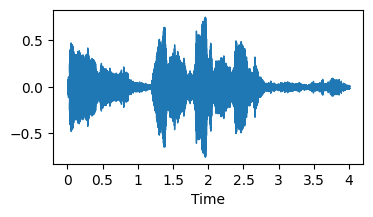

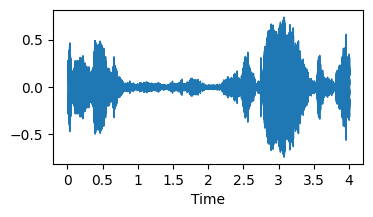

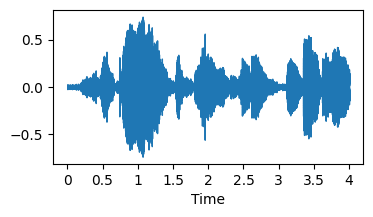

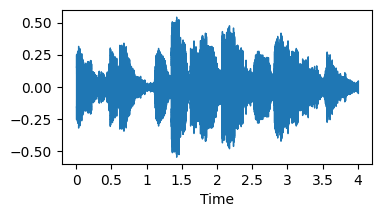

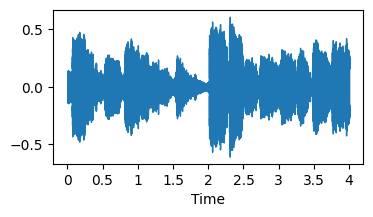

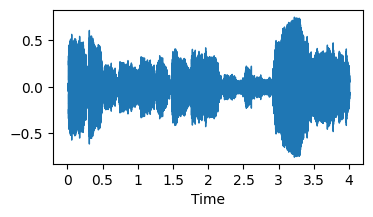

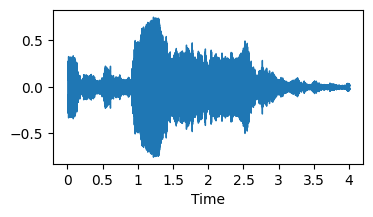

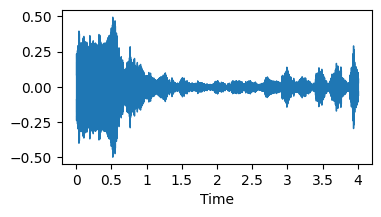

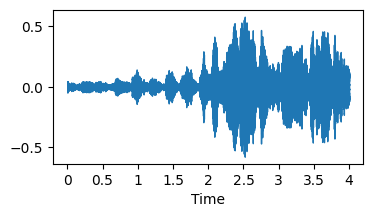

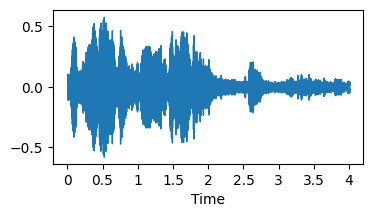

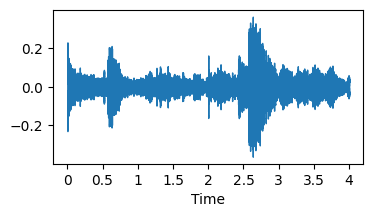

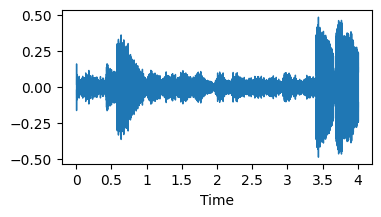

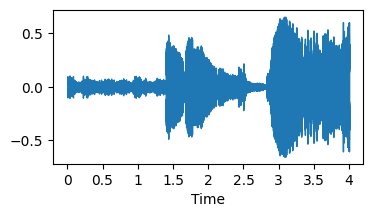

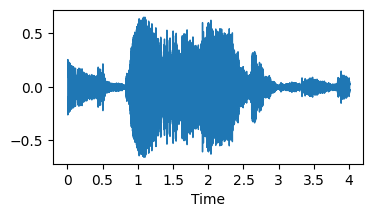

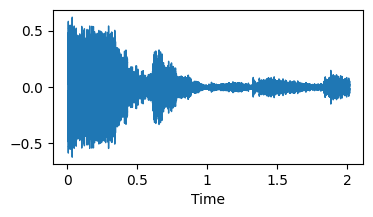

In [23]:
for i in range(num_chunks):
    start_sample = i * (chunk_samples - overlap_samples)
    end_sample = start_sample + chunk_samples
    chunk = y[start_sample:end_sample]
    plt.figure(figsize=(4,2))
    librosa.display.waveshow(chunk, sr=sr)
    plt.show()

Plotting Mel-Spectogram Chunks

In [24]:
def plot_mel_spectrogram(y, sr):
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(log_mel_spectrogram, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    plt.show()

In [25]:
y, sampling_rate = librosa.load(file_name,sr=44100)

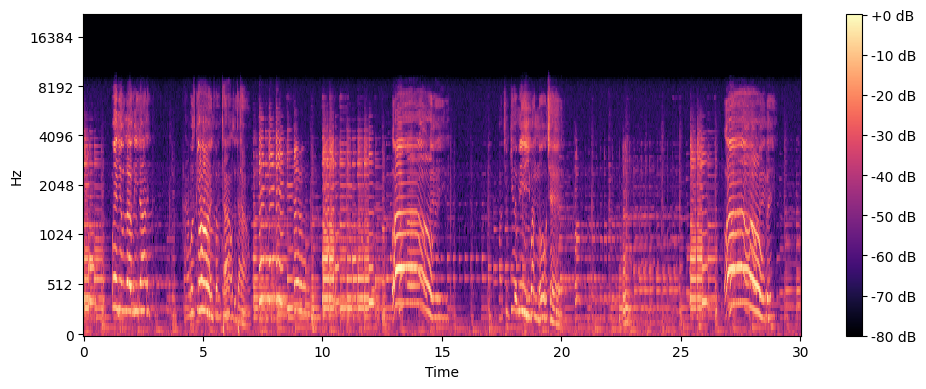

In [26]:
plot_mel_spectrogram(y, sampling_rate)

In [27]:
def plot_mel_spectrogram_chunks(y, sr):
    chunk_duration = 4
    overlap_duration = 2
    chunk_samples = int(chunk_duration * sr)
    overlap_samples = int(overlap_duration * sr)
    num_chunks=int(np.ceil((len(y)-chunk_samples)/(chunk_samples-overlap_samples)))+1
    for i in range(num_chunks):
        start_sample = i * (chunk_samples - overlap_samples)
        end_sample = start_sample + chunk_samples
        chunk = y[start_sample:end_sample]
        mel_spectrogram= librosa.feature.melspectrogram(y=chunk, sr=sr)

        log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(log_mel_spectrogram, sr=sr, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.tight_layout()
        plt.show()

In [28]:
y,sr= librosa.load(file_name,sr=44100)

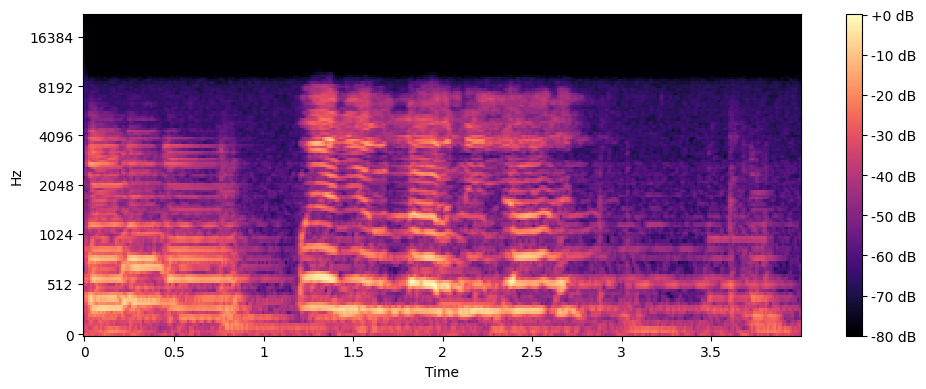

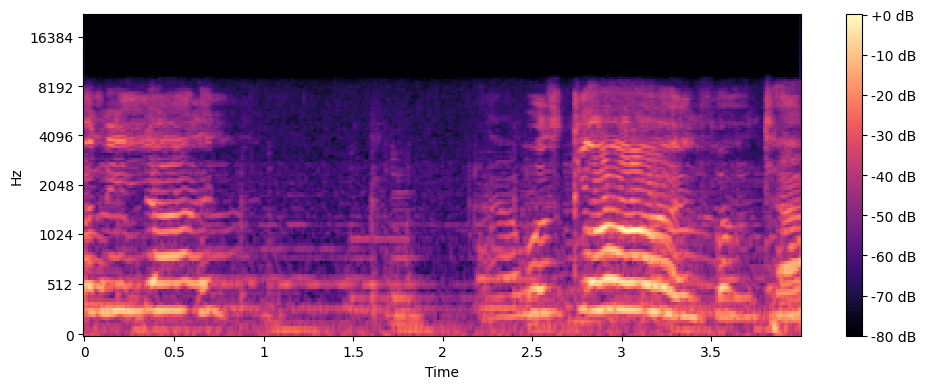

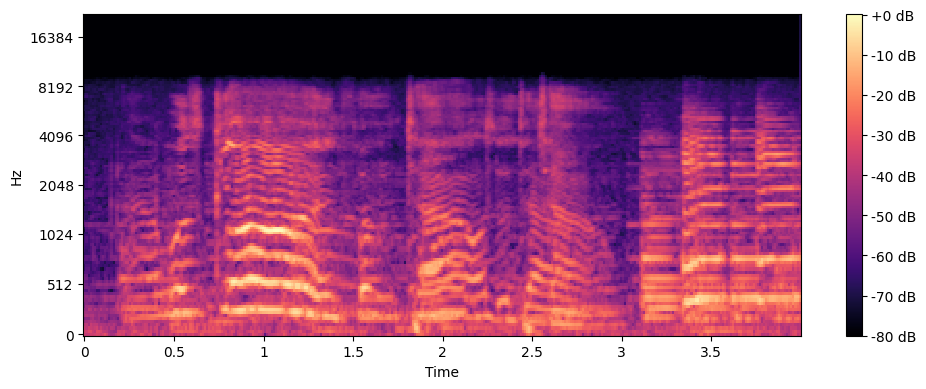

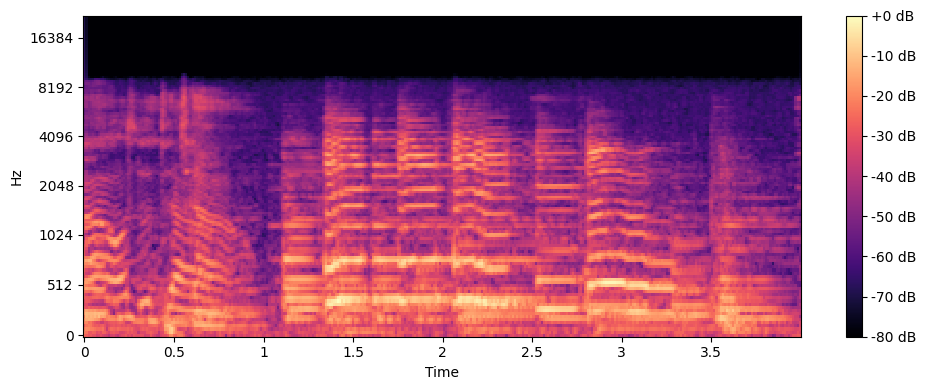

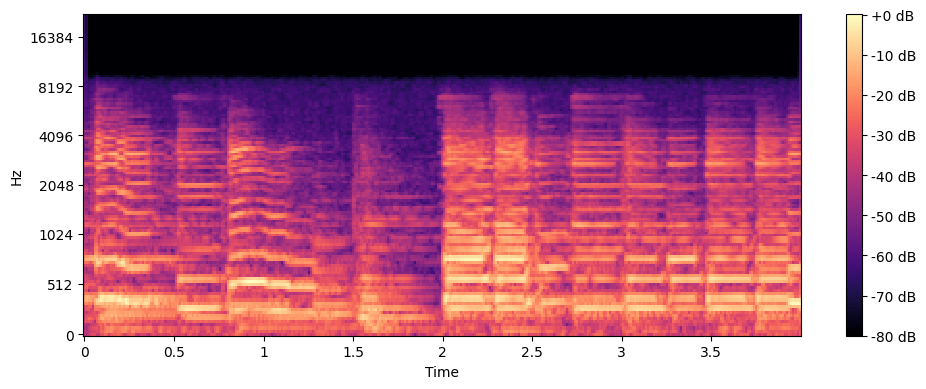

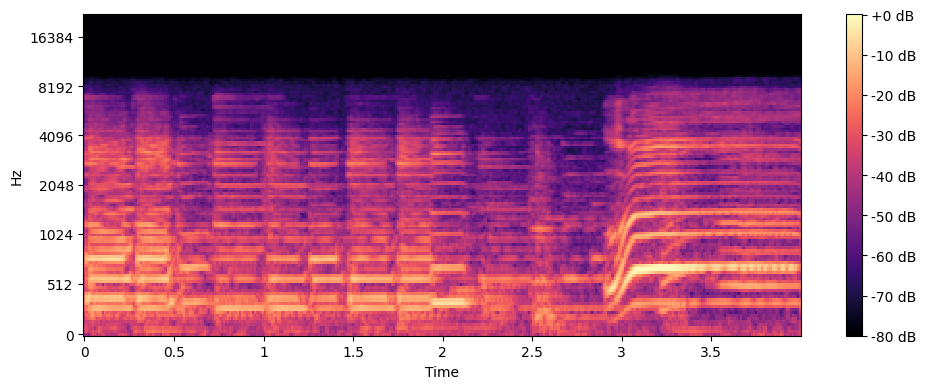

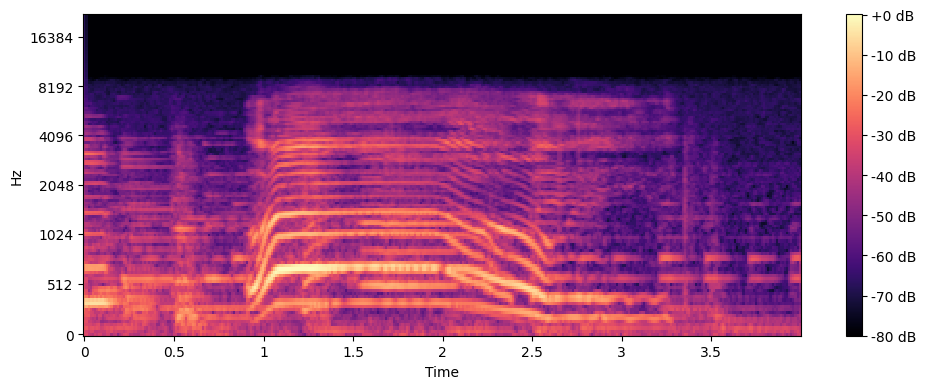

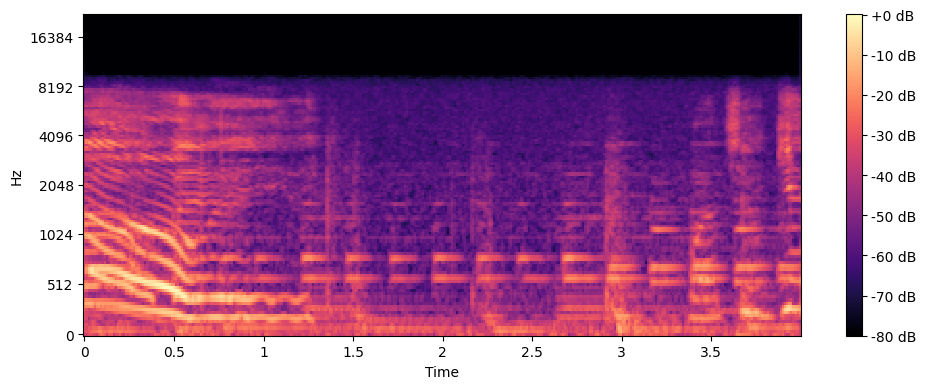

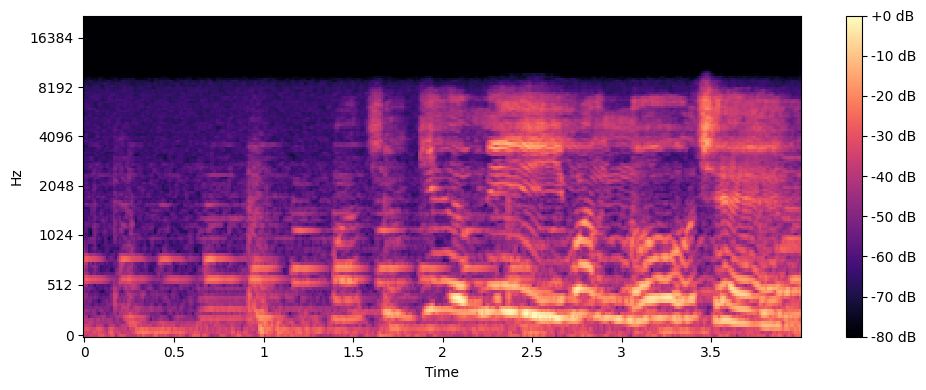

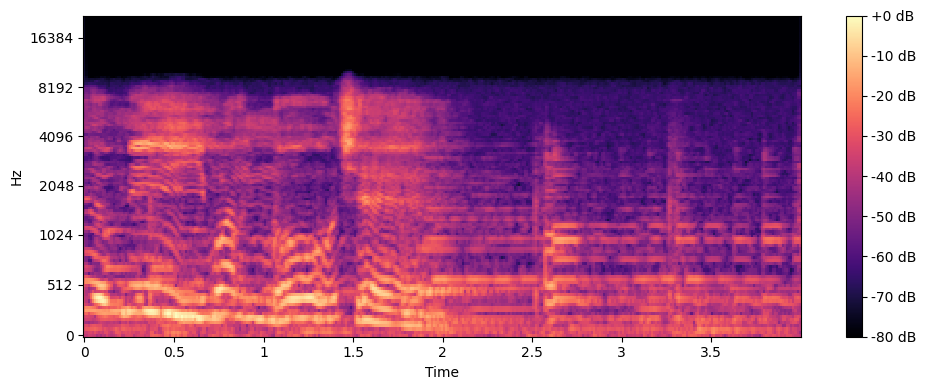

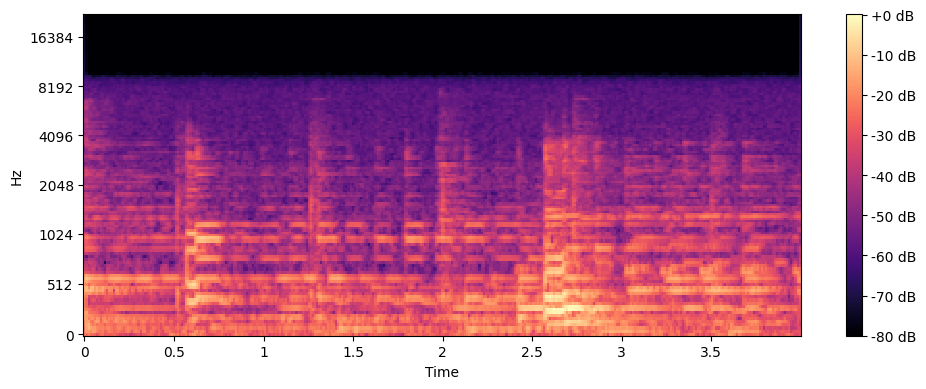

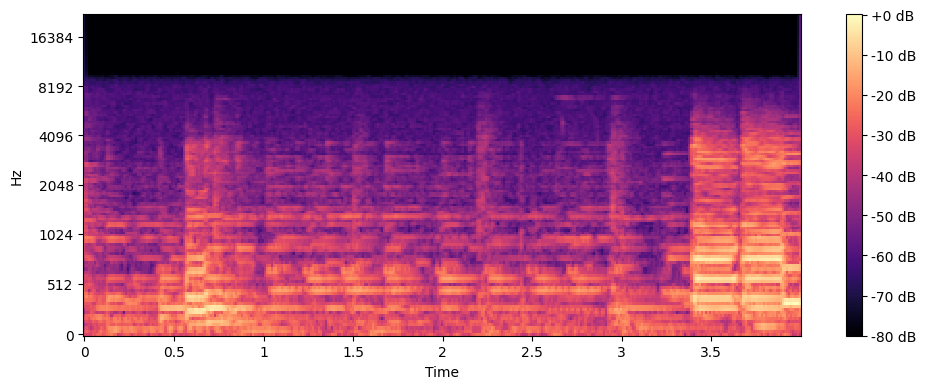

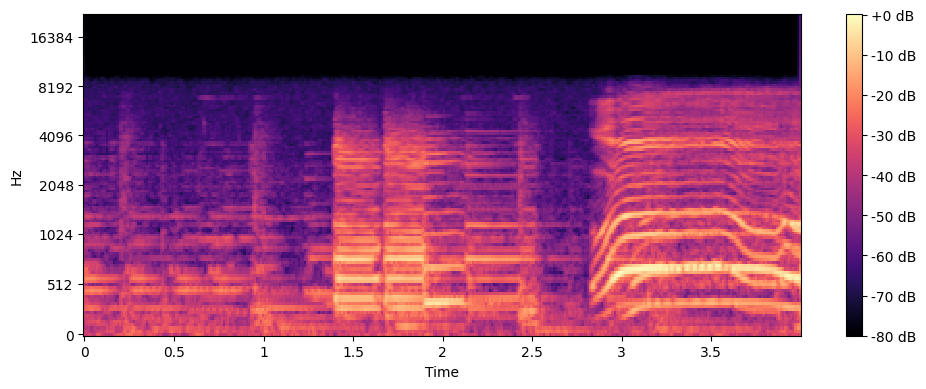

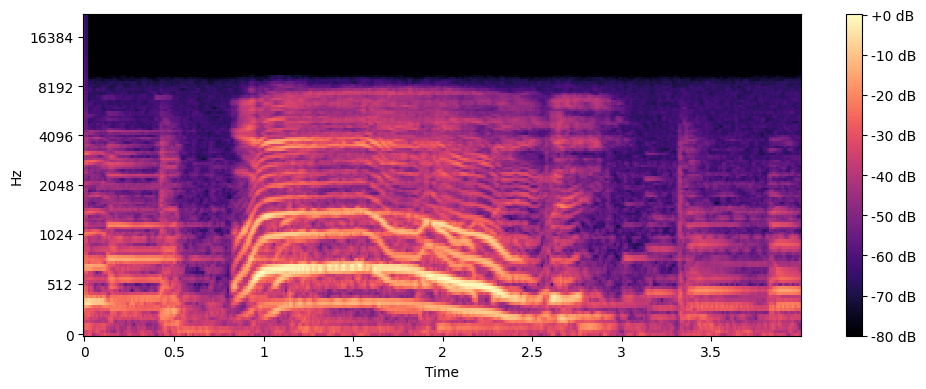

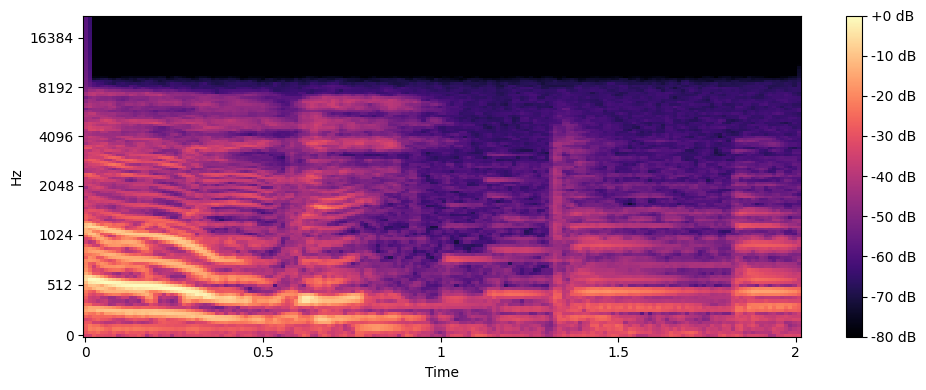

In [29]:
plot_mel_spectrogram_chunks(y,sr)

In [30]:
data_dir = "./fml-project/genres_original"
classes = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

In [31]:
def preprocess(data_dir,classes,target_shape=(150,150)):
  data=[]
  labels=[]
  for i_class,class_name in enumerate(classes):
    class_dir = os.path.join(data_dir,class_name)
    print("Processing for Category: ", class_name)
    for file_name in os.listdir(class_dir):
      if file_name.endswith('.wav'):
        file_path = os.path.join(class_dir,file_name)
        audio_data,sample_rate = librosa.load(file_path,sr=None)
        chunk_duration = 4
        overlap_duration = 2
        chunk_samples = int(chunk_duration * sample_rate)
        overlap_samples = int(overlap_duration * sample_rate)
        num_chunks=int(np.ceil((len(audio_data)-chunk_samples)/(chunk_samples-overlap_samples)))+1
        for i in range(num_chunks):
            start_sample = i * (chunk_samples - overlap_samples)
            end_sample = start_sample + chunk_samples
            chunk = audio_data[start_sample:end_sample]
            mel_spectrogram= librosa.feature.melspectrogram(y=chunk, sr=sample_rate)
            mel_spectrogram = tf.expand_dims(mel_spectrogram, axis=-1)
            mel_spectrogram = tf.image.resize(mel_spectrogram,target_shape)
            data.append(mel_spectrogram)
            labels.append(i_class)
  return np.array(data),np.array(labels)

In [32]:
data,labels = preprocess(data_dir,classes)

Processing for Category blues
Processing for Category classical
Processing for Category country
Processing for Category disco
Processing for Category hiphop
Processing for Category jazz
Processing for Category metal
Processing for Category pop
Processing for Category reggae
Processing for Category rock


In [33]:
from keras.utils import to_categorical
labels = to_categorical(labels,num_classes=len(classes))

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(data,labels,test_size=0.2, random_state=101)

MODEL TRAINING

In [35]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Model
from keras.optimizers import Adam

In [36]:
model = tf.keras.models.Sequential()

In [37]:
model.add(Conv2D( filters=32,kernel_size=3,padding='same', activation='relu', input_shape=X_train[0].shape))
model.add(Conv2D( filters=32,kernel_size=3,padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model.add(Conv2D( filters=64,kernel_size=3,padding='same', activation='relu', input_shape=X_train[0].shape))
model.add(Conv2D( filters=64,kernel_size=3,padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

In [39]:
model.add(Conv2D( filters=128,kernel_size=3,padding='same', activation='relu', input_shape=X_train[0].shape))
model.add(Conv2D( filters=128,kernel_size=3,padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

In [40]:
model.add(Dropout(0.3))

In [41]:
model.add(Conv2D( filters=256,kernel_size=3,padding='same', activation='relu', input_shape=X_train[0].shape))
model.add(Conv2D( filters=256,kernel_size=3,padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

In [42]:
model.add(Conv2D( filters=512,kernel_size=3,padding='same', activation='relu', input_shape=X_train[0].shape))
model.add(Conv2D( filters=512,kernel_size=3,padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

In [43]:
model.add(Dropout(0.3))
model.add(Flatten())

In [44]:
model.add(Dense(units=1200, activation='relu'))
model.add(Dropout(0.45))

In [45]:
model.add(Dense(units=len(classes), activation='softmax'))

In [46]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy','categorical_accuracy'])

In [47]:
training_log= model.fit(X_train,Y_train,batch_size=32,epochs=30,validation_data=(X_test,Y_test))

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 70s 141ms/step - accuracy: 0.2157 - categorical_accuracy: 0.2157 - loss: 2.1656 - val_accuracy: 0.4480 - val_categorical_accuracy: 0.4480 - val_loss: 1.5170
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 48s 88ms/step - accuracy: 0.4926 - categorical_accuracy: 0.4926 - loss: 1.4401 - val_accuracy: 0.5967 - val_categorical_accuracy: 0.5967 - val_loss: 1.1310
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 88ms/step - accuracy: 0.6102 - categorical_accuracy: 0.6102 - loss: 1.1223 - val_accuracy: 0.7085 - val_categorical_accuracy: 0.7085 - val_loss: 0.8702
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 89ms/step - accuracy: 0.6864 - categorical_accuracy: 0.6864 - loss: 0.9101 - val_accuracy: 0.7235 - val_categorical_accuracy: 0.7235 - val_loss: 0.8301
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 87ms/step - accuracy: 0.7466 - categorical_accuracy: 0.7466 - loss: 0.7473 - val_accuracy: 0.7829 - val_categorical_accuracy: 0.7829 - val_loss: 0.6488
Epoch 6/30
375/375 

In [48]:
model.save("Genre-Classifier-Model.h5")

In [49]:
import json
with open("training_log.json","w") as f:
  json.dump(training_log.history,f)

In [50]:
model = tf.keras.models.load_model("Genre-Classifier-Model.h5")
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 150, 150, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 75, 75, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 37, 37, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 18, 18, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 9, 9, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1200)                │       9,831,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          12,010 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,555,260 (55.52 MB)

 Trainable params: 14,555,258 (55.52 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [51]:
import json
with open("training_log.json","r") as f:
  training_log = json.load(f)

MODEL EVALUATION

In [52]:
model.evaluate(X_test,Y_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9368 - categorical_accuracy: 0.9368 - loss: 0.2377


[0.2192520648241043, 0.9429619908332825, 0.9429619908332825]

LOSS AND ACCURACY PLOTS

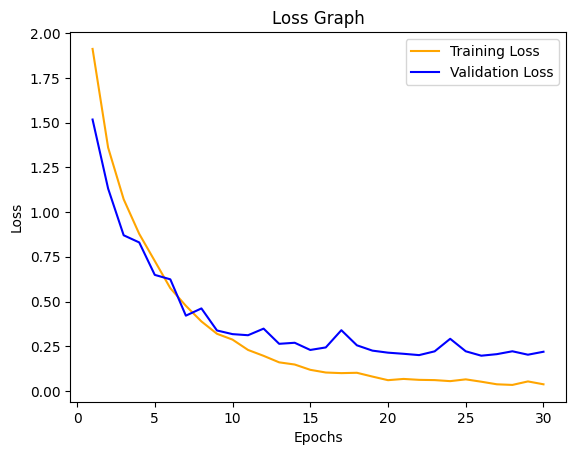

In [53]:
# Loss Plot

epochs= [i for i in range(1,31)]
plt.plot(epochs,training_log['loss'],label='Training Loss',color='orange')
plt.plot(epochs,training_log['val_loss'],label='Validation Loss',color='blue')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Graph')
plt.show()

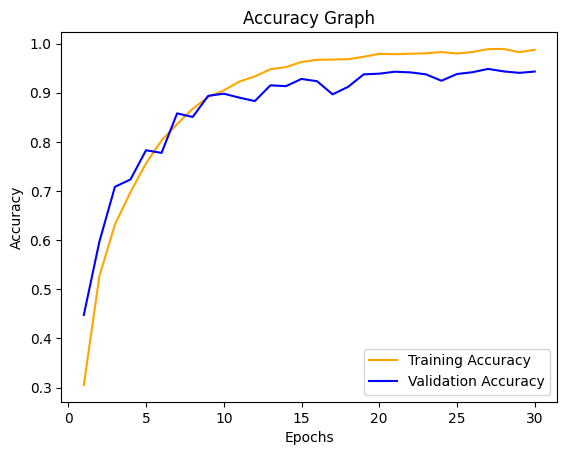

In [54]:
# Accuracy Plot

epochs= [i for i in range(1,31)]
plt.plot(epochs,training_log['accuracy'],label='Training Accuracy',color='orange')
plt.plot(epochs,training_log['val_accuracy'],label='Validation Accuracy',color='blue')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')
plt.show()

In [55]:
y_pred=model.predict(X_test)
y_pred

94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step


array([[5.22505616e-06, 1.80915973e-04, 3.72755778e-04, ...,
        5.09519363e-04, 1.60804670e-03, 6.23094942e-03],
       [8.42928930e-05, 1.20254862e-03, 7.44927287e-01, ...,
        1.22969213e-03, 7.21033216e-02, 1.71991587e-01],
       [1.46143584e-05, 1.01923430e-03, 9.21587271e-05, ...,
        1.99718341e-01, 1.54414065e-02, 7.55997837e-01],
       ...,
       [9.48042755e-11, 1.30356555e-13, 3.86064306e-11, ...,
        2.73707911e-07, 1.31926443e-08, 3.32429501e-11],
       [3.70015732e-06, 1.84795308e-08, 1.63059826e-06, ...,
        4.55421088e-08, 1.32573723e-05, 6.39569862e-07],
       [2.13579871e-17, 2.93426181e-25, 4.82660423e-27, ...,
        1.98511916e-05, 8.38808461e-13, 6.94163669e-22]], dtype=float32)

In [56]:
predictions = np.argmax(y_pred,axis=1)
predictions

array([5, 2, 9, ..., 3, 5, 4])

In [57]:
true_labels = np.argmax(Y_test,axis=1)

In [59]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(true_labels,predictions)
print(classification_report(true_labels,predictions,target_names=classes))

              precision    recall  f1-score   support

       blues       0.91      0.98      0.94       318
   classical       0.92      1.00      0.96       286
     country       0.96      0.88      0.92       308
       disco       0.92      0.94      0.93       305
      hiphop       0.95      0.96      0.96       311
        jazz       0.95      0.93      0.94       288
       metal       0.97      0.95      0.96       318
         pop       0.95      0.96      0.95       273
      reggae       0.96      0.96      0.96       313
        rock       0.94      0.85      0.90       278

    accuracy                           0.94      2998
   macro avg       0.94      0.94      0.94      2998
weighted avg       0.94      0.94      0.94      2998



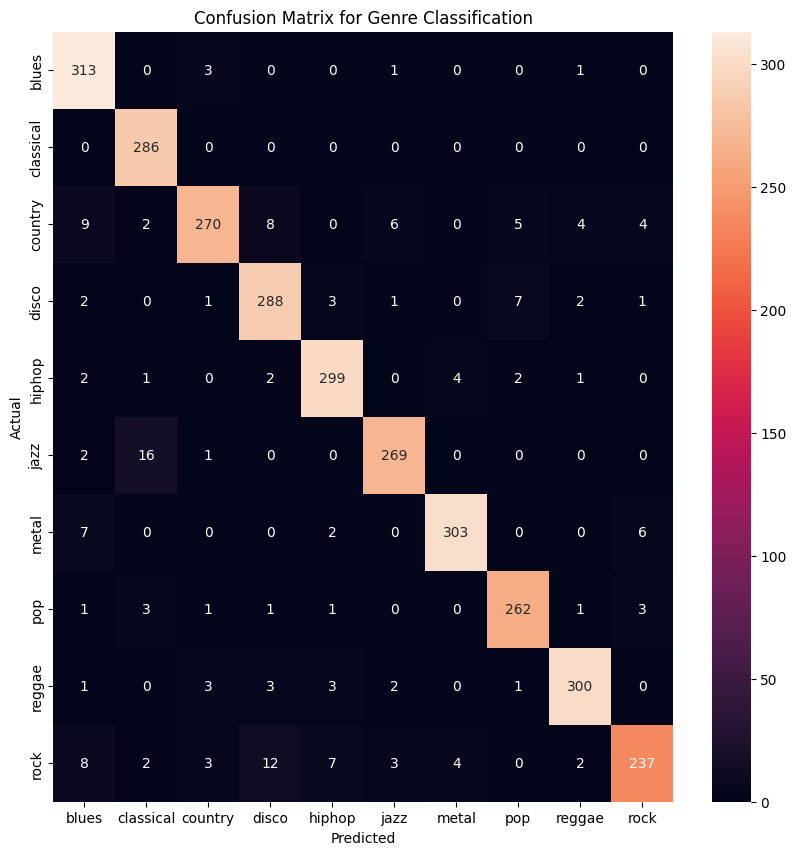

In [61]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='d',xticklabels=classes,yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Genre Classification')
plt.show()